<a href="https://colab.research.google.com/github/ShwetaBharambe5/Object-Recognition-for-Robotics-Application/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir=data_dir = pathlib.Path("/content/drive/My Drive/dataset")

In [ ]:
batch_size = 32
img_height = 480
img_width = 640

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.6,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 20 classes.
Using 1204 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 20 classes.
Using 602 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bodylotion', 'book', 'cellphone', 'flower', 'glass', 'hairbrush', 'hairclip', 'mouse', 'mug', 'ovenglove', 'pencilcase', 'perfume', 'remote', 'ringbinder', 'soapdispenser', 'sodabottle', 'sprayer', 'squeezer', 'sunglasses', 'wallet']


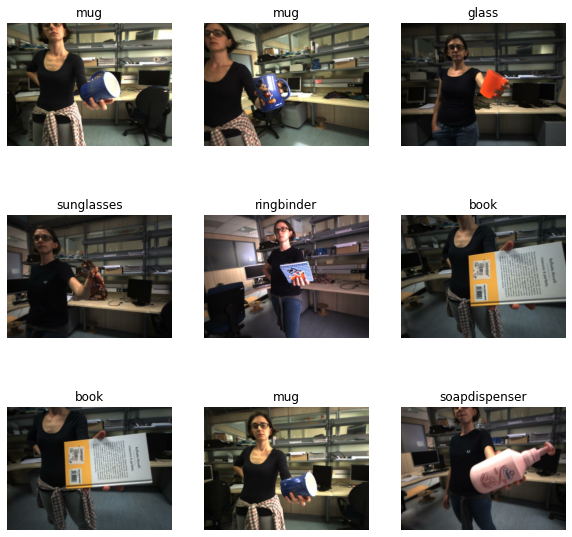

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 480, 640, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 480, 640, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 480, 640, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 240, 320, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 240, 320, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 120, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 120, 160, 64)     

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 5s 125ms/step - loss: 3.1323 - accuracy: 0.3248 - val_loss: 0.8106 - val_accuracy: 0.7841
Epoch 2/10
38/38 [==============================] - 4s 103ms/step - loss: 0.3336 - accuracy: 0.9037 - val_loss: 0.2224 - val_accuracy: 0.9419
Epoch 3/10
38/38 [==============================] - 4s 103ms/step - loss: 0.0392 - accuracy: 0.9909 - val_loss: 0.1998 - val_accuracy: 0.9402
Epoch 4/10
38/38 [==============================] - 4s 103ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0901 - val_accuracy: 0.9850
Epoch 5/10
38/38 [==============================] - 4s 104ms/step - loss: 7.2502e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9834
Epoch 6/10
38/38 [==============================] - 4s 104ms/step - loss: 3.5382e-04 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9834
Epoch 7/10
38/38 [==============================] - 4s 104ms/step - loss: 2.1344e-04 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 0

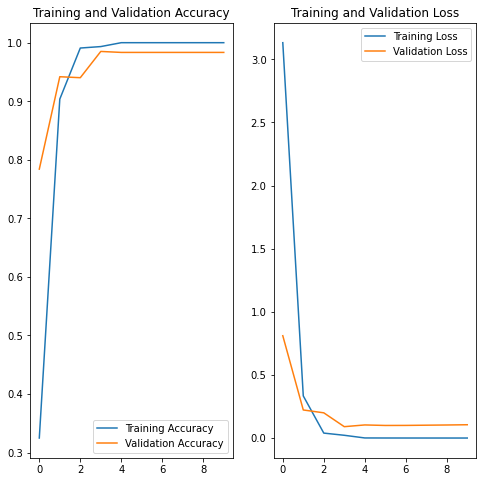

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

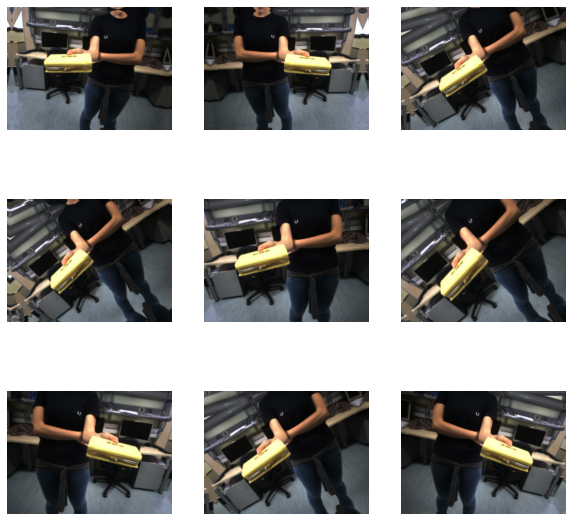

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 480, 640, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 480, 640, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 480, 640, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 240, 320, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 240, 320, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 120, 160, 32)     0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
38/38 [==============================] - 6s 123ms/step - loss: 4.4610 - accuracy: 0.0905 - val_loss: 2.9067 - val_accuracy: 0.1578
Epoch 2/15
38/38 [==============================] - 4s 118ms/step - loss: 2.5944 - accuracy: 0.2267 - val_loss: 2.1600 - val_accuracy: 0.2957
Epoch 3/15
38/38 [==============================] - 4s 118ms/step - loss: 1.6017 - accuracy: 0.5224 - val_loss: 1.0709 - val_accuracy: 0.6462
Epoch 4/15
38/38 [==============================] - 4s 118ms/step - loss: 0.9322 - accuracy: 0.6952 - val_loss: 0.5731 - val_accuracy: 0.8140
Epoch 5/15
38/38 [==============================] - 4s 118ms/step - loss: 0.4540 - accuracy: 0.8538 - val_loss: 0.3881 - val_accuracy: 0.8439
Epoch 6/15
38/38 [==============================] - 4s 118ms/step - loss: 0.2969 - accuracy: 0.9028 - val_loss: 0.1848 - val_accuracy: 0.9286
Epoch 7/15
38/38 [==============================] - 4s 118ms/step - loss: 0.1699 - accuracy: 0.9543 - val_loss: 0.1355 - val_accuracy: 0.9601
Epoch 

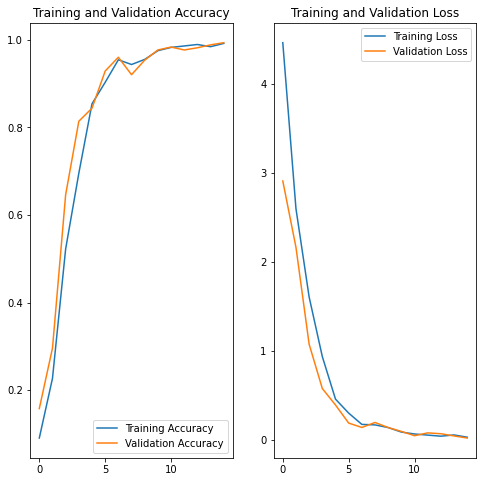

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img("/content/drive/My Drive/images/0001.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to bodylotion with a 99.82 percent confidence.
